# Movie Trailer Analysis Notebook

This notebook performs basic analysis of movie trailers, extracting and visualizing key information such as:
- Video duration, FPS, and resolution
- Audio tracks
- Video frames

This provides a foundation for more advanced AI-based movie analysis.

## 1. Setup and Dependencies

First, we'll import the necessary libraries for video and audio processing.

In [1]:
# Import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from moviepy.editor import VideoFileClip
import librosa
import librosa.display
import cv2

# Configure matplotlib for better display in notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)

## 2. Load Video File

Using MoviePy to load the sample trailer video file.

In [2]:
# File paths
video_path = 'data/sample_trailer.mp4'
audio_output_path = 'outputs/sample_audio.wav'

# Set this manually or pass from UI in future
video_type = "trailer"  # options: vlog, podcast, dance, scene, etc.
# Save video type for downstream usage
with open("outputs/video_type.txt", "w") as f:
    f.write(video_type)
# Check if video file exists
if not os.path.exists(video_path):
    print(f"Error: Video file '{video_path}' not found.")
    print("Please place a sample trailer video in the data directory.")
else:
    # Load the video file
    video_clip = VideoFileClip(video_path)
    print(f"Successfully loaded video: {video_path}")

Successfully loaded video: data/sample_trailer.mp4


## 3. Video Metadata Analysis

Extracting and displaying key metadata from the video.

In [3]:
try:
    # Extract video metadata
    duration = video_clip.duration
    fps = video_clip.fps
    width, height = video_clip.size
    
    # Display the metadata
    print("Video Metadata:")
    print(f"Duration: {duration:.2f} seconds")
    print(f"FPS: {fps:.2f}")
    print(f"Resolution: {width} × {height} pixels")
except Exception as e:
    print(f"Error extracting video metadata: {e}")

Video Metadata:
Duration: 137.51 seconds
FPS: 23.98
Resolution: 1280 × 720 pixels


## 4. Extract and Save Audio

Extracting the audio track from the video and saving it as a WAV file.

In [4]:
try:
    # Extract audio from video
    audio_clip = video_clip.audio
    
    # Save audio to WAV file
    audio_clip.write_audiofile(audio_output_path)
    
    print(f"Audio successfully extracted and saved to: {audio_output_path}")
except Exception as e:
    print(f"Error extracting audio: {e}")

MoviePy - Writing audio in outputs/sample_audio.wav


MoviePy - Done.
Audio successfully extracted and saved to: outputs/sample_audio.wav


## 5. Visualize Audio Waveform

Loading the extracted audio and visualizing its waveform using Librosa.

Audio loaded: 6064191 samples, sample rate: 44100 Hz
Audio duration: 137.51 seconds


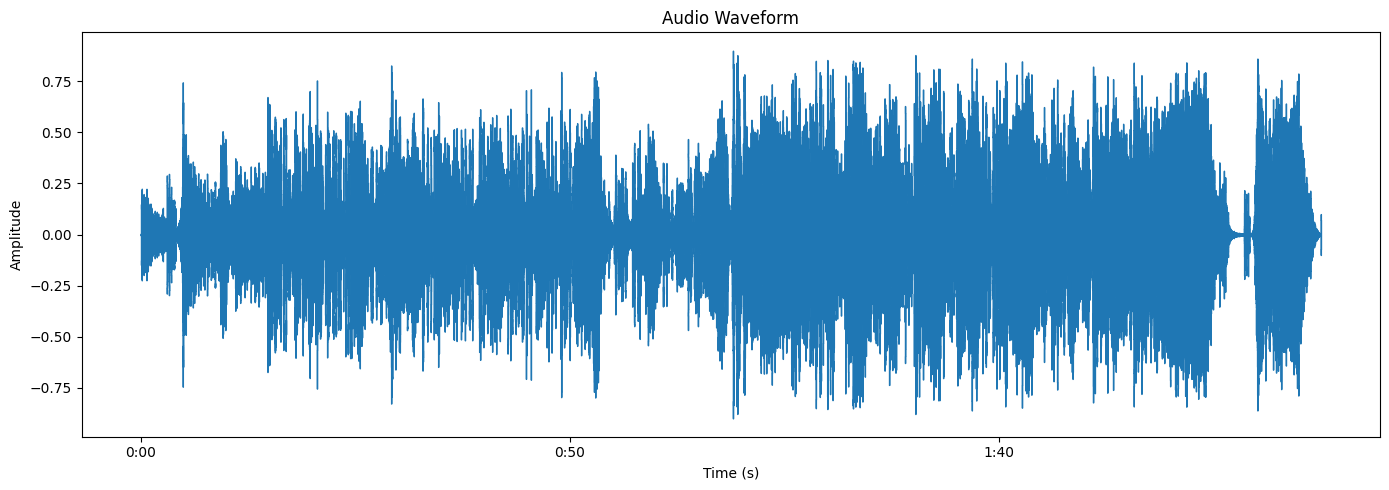

In [5]:
try:
    # Load the audio file using librosa
    y, sr = librosa.load(audio_output_path, sr=None)
    
    # Get audio duration
    audio_duration = librosa.get_duration(y=y, sr=sr)
    
    print(f"Audio loaded: {len(y)} samples, sample rate: {sr} Hz")
    print(f"Audio duration: {audio_duration:.2f} seconds")
    
    # Plot the waveform
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(y, sr=sr)
    plt.title('Audio Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error visualizing audio: {e}")

## 6. Extract and Display Video Frame

Extracting and displaying the first frame of the video.

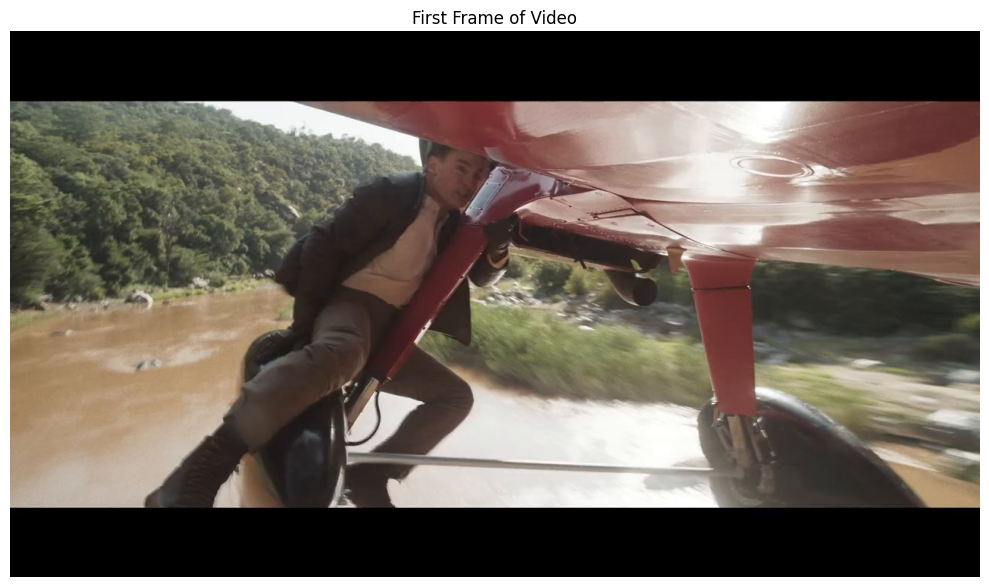

First frame saved as 'outputs/first_frame.jpg'


In [6]:
# Extract frame using MoviePy
try:
    # Get the first frame (at time t=0)
    first_frame = video_clip.get_frame(0)
    
    # Display the frame
    plt.figure(figsize=(10, 8))
    plt.imshow(first_frame)
    plt.title('First Frame of Video')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    # Save the frame as an image
    plt.imsave('outputs/first_frame.jpg', first_frame)
    print("First frame saved as 'outputs/first_frame.jpg'")
except Exception as e:
    print(f"Error extracting frame: {e}")

## 7. Clean Up Resources

Properly close and release all resources.

In [7]:
# Close the video clip to release resources
try:
    video_clip.close()
    print("Video clip resources released.")
except Exception as e:
    print(f"Error closing video clip: {e}")

Video clip resources released.


## 8. Conclusion

This notebook demonstrates basic movie trailer analysis techniques including:
- Extracting video metadata (duration, FPS, resolution)
- Separating and analyzing audio tracks
- Extracting video frames

These foundational techniques can be expanded for more advanced AI-based movie analysis, such as:
- Scene detection and segmentation
- Visual style analysis
- Audio emotion detection
- Character recognition
- Pattern identification across different trailers